

<p align="center"><strong> MohammadAmin M. Shabestari </strong></p>
---

04/17/2025

[LinkedIn Profile](https://www.linkedin.com/in/mohammadamin-shabestari) | [GitHub Profile](https://github.com/Msh8303)  
✉️ **Email:** shabestari8303p@gmail.com  

---


# 📊 **Dataset Analysis: Concrete Data Dataset**

## 🧩 **Introduction**

Welcome! In this project, we're diving into the **Concrete Compressive Strength Dataset**, a well-known dataset used for predicting the compressive strength of concrete based on its ingredients. The compressive strength of concrete is a crucial property in civil engineering, directly affecting structural stability and durability. By analyzing this dataset, we aim to understand the relationship between various concrete components and the final strength of the mixture.

This dataset is often used in **regression tasks** to evaluate different predictive models.

---

## 🧱 **Feature Overview**

Below is a brief explanation of each feature (input variable) included in the dataset:

| 🔢 **Feature** | 📄 **Description** | ⚖️ **Unit** |
|----------------|--------------------|--------------|
| **Cement** | Amount of cement used in the mix | kg/m³ |
| **Blast Furnace Slag** | A byproduct from steel production used to enhance concrete properties | kg/m³ |
| **Fly Ash** | A byproduct of coal combustion used as a partial cement replacement | kg/m³ |
| **Water** | Amount of water used in the mix | kg/m³ |
| **Superplasticizer** | Chemical admixture that increases concrete fluidity without adding more water | kg/m³ |
| **Coarse Aggregate** | Large particles (gravel) used in concrete | kg/m³ |
| **Fine Aggregate** | Small particles (sand) used in concrete | kg/m³ |
| **Age** | Number of days the concrete has been curing | Days |
| **Compressive Strength** *(target)* | Strength of the concrete mixture after curing | MPa |

> 📌 **Note:** All input variables are continuous and measured in **kg per cubic meter (kg/m³)**, except **Age** and the **target variable** (Compressive Strength).


### 🔗 **Access the dataset here:** [Concrete Data Dataset](https://www.kaggle.com/datasets/zain280/concrete-data)
---




# 🖥️ Code Analysis

This section covers the code developed for predicting the **compressive strength of concrete** using various machine learning tools and libraries, primarily built with **PyTorch**, **scikit-learn**, **Pandas**, and **Plotly** for visualization. The overall objective is to solve a **regression problem** using neural networks and advanced data processing techniques.


## 📦 1. Imported Libraries

The following Python libraries are used throughout this project:

In [84]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import torch.nn as nn
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from torch.nn import HuberLoss
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import torch
from sklearn.utils.class_weight import compute_class_weight


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

---


## 🔍 2. Dataset Summary and Exploration

- The dataset is loaded from a CSV file.

In [21]:
df = pd.read_csv('concrete_data.csv')
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77




- A descriptive overview is generated, showing the mean, standard deviation, min, and max values for each feature. This helps understand the scale and range of each variable.


In [4]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


- Information about data types and memory usage.
- Null value checks to ensure data quality.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

---

## 📊 3. Data Visualization

To better understand the structure of the data, visual exploration techniques are used:


### 📈 Feature Distributions

Histogram plots show the distribution of each numerical feature. These reveal skewness, outliers, and the overall shape of data.


- Symmetric (Bell-shaped/Normal): Data is evenly distributed around the center. (e.g., 'water', 'fine_aggregate' might approximate this).
- Skewed: Data is not symmetric.
    - Right-Skewed (Positively Skewed): The tail on the right side is longer. Most values are clustered on the left, with fewer high values. (e.g., 'blast_furnace_slag', 'fly_ash', 'superplasticizer', 'age' are clearly right-skewed).
    - Left-Skewed (Negatively Skewed): The tail on the left side is longer. Most values are clustered on the right. (None seem strongly left-skewed here).
- Uniform: All bins have roughly the same frequency 


- These histograms reveal that many of the input features (slag, fly ash, superplasticizer, age) are heavily skewed, meaning most samples have low values for these features. Other features like water and aggregates have more symmetric distributions

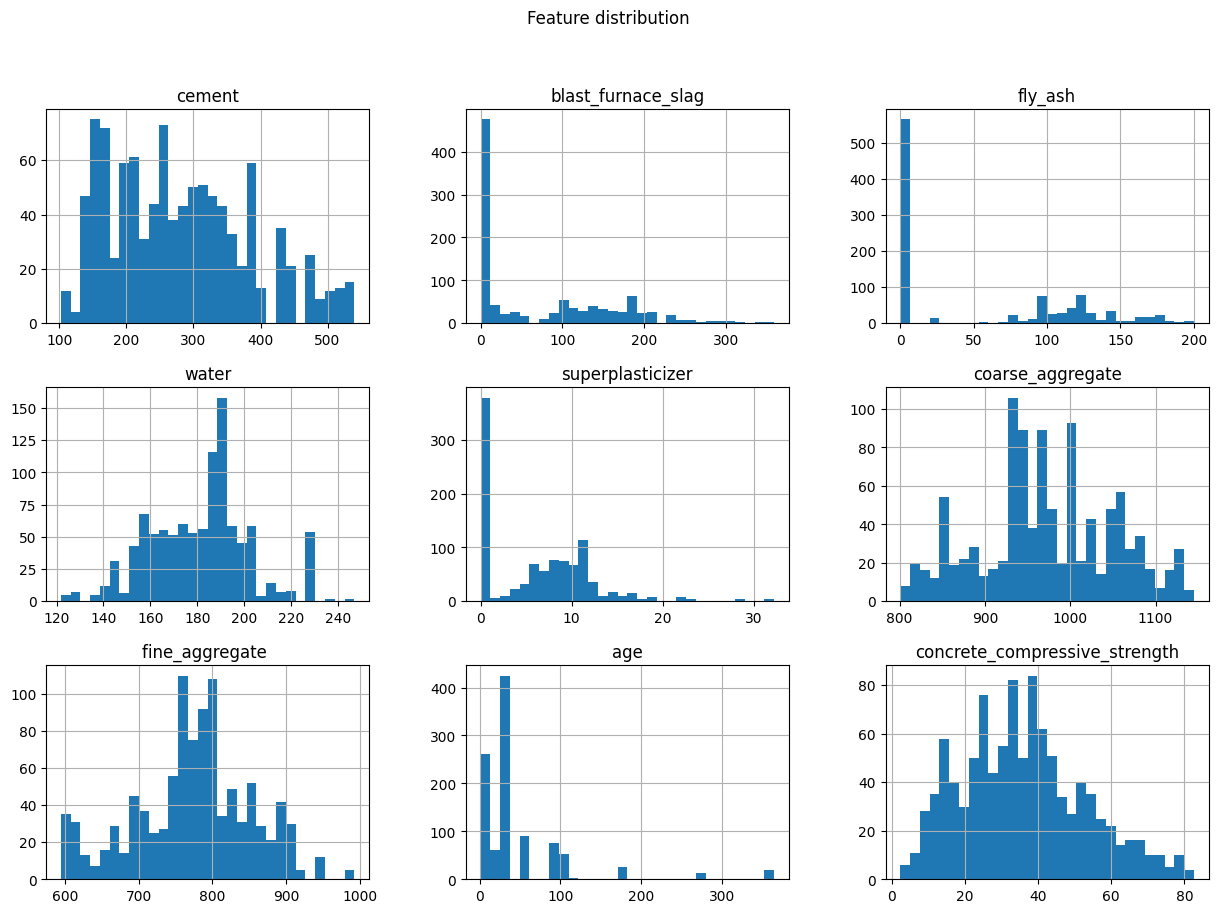

In [ ]:


df.hist(bins = 30, figsize = (15, 10))
plt.suptitle('Feature distribution')
plt.show()


### 🔗 Correlation Matrix

A heatmap displays the correlation between all pairs of features. This helps in identifying multicollinearity or strong predictors of the target variable.


- The matrix reveals expected relationships (cement, age, superplasticizer positively correlated with strength; water negatively correlated) and highlights a moderate negative correlation between water and superplasticizer usage. No features stand out as immediate candidates for removal based purely on these linear correlations.

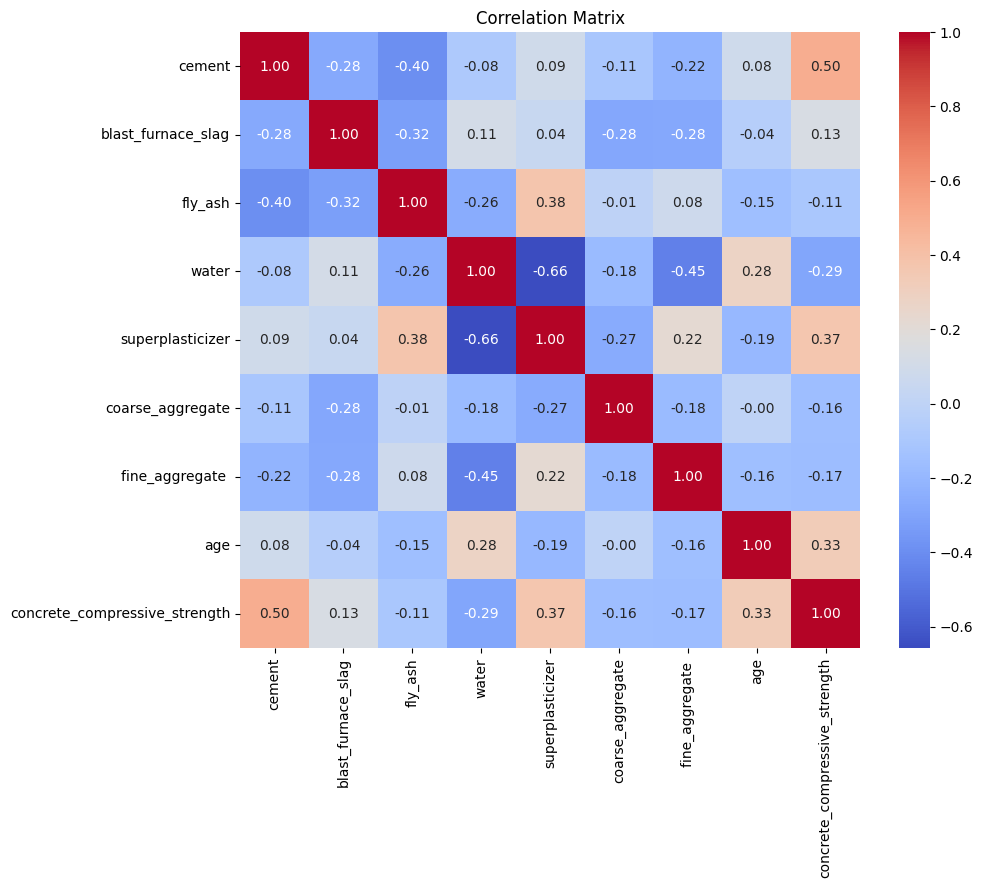

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

### 🔄 Pairwise Relationships

Scatter plots for each pair of features are visualized using pair plots to show potential linear or nonlinear trends.


- **Diagonal (Histograms)**: Analyze these for shape (symmetry, skewness, modality), central tendency, and spread, just as you did with the individual histograms.

- **Off-Diagonal (Scatter Plots)**: For each scatter plot, look for:
    - Trend/Direction: Does the cloud of points generally slope upwards (positive relationship), downwards (negative relationship), or is it flat (no clear relationship)?
    - Strength: Are the points tightly packed along a line or curve (strong relationship), or are they widely scattered (weak relationship)?
    - Shape/Form: Is the relationship best described by a straight line (linear) or a curve (non-linear)?
    - Outliers: Are there points that lie far away from the general pattern?
    - Clusters: Do the points form distinct groups?

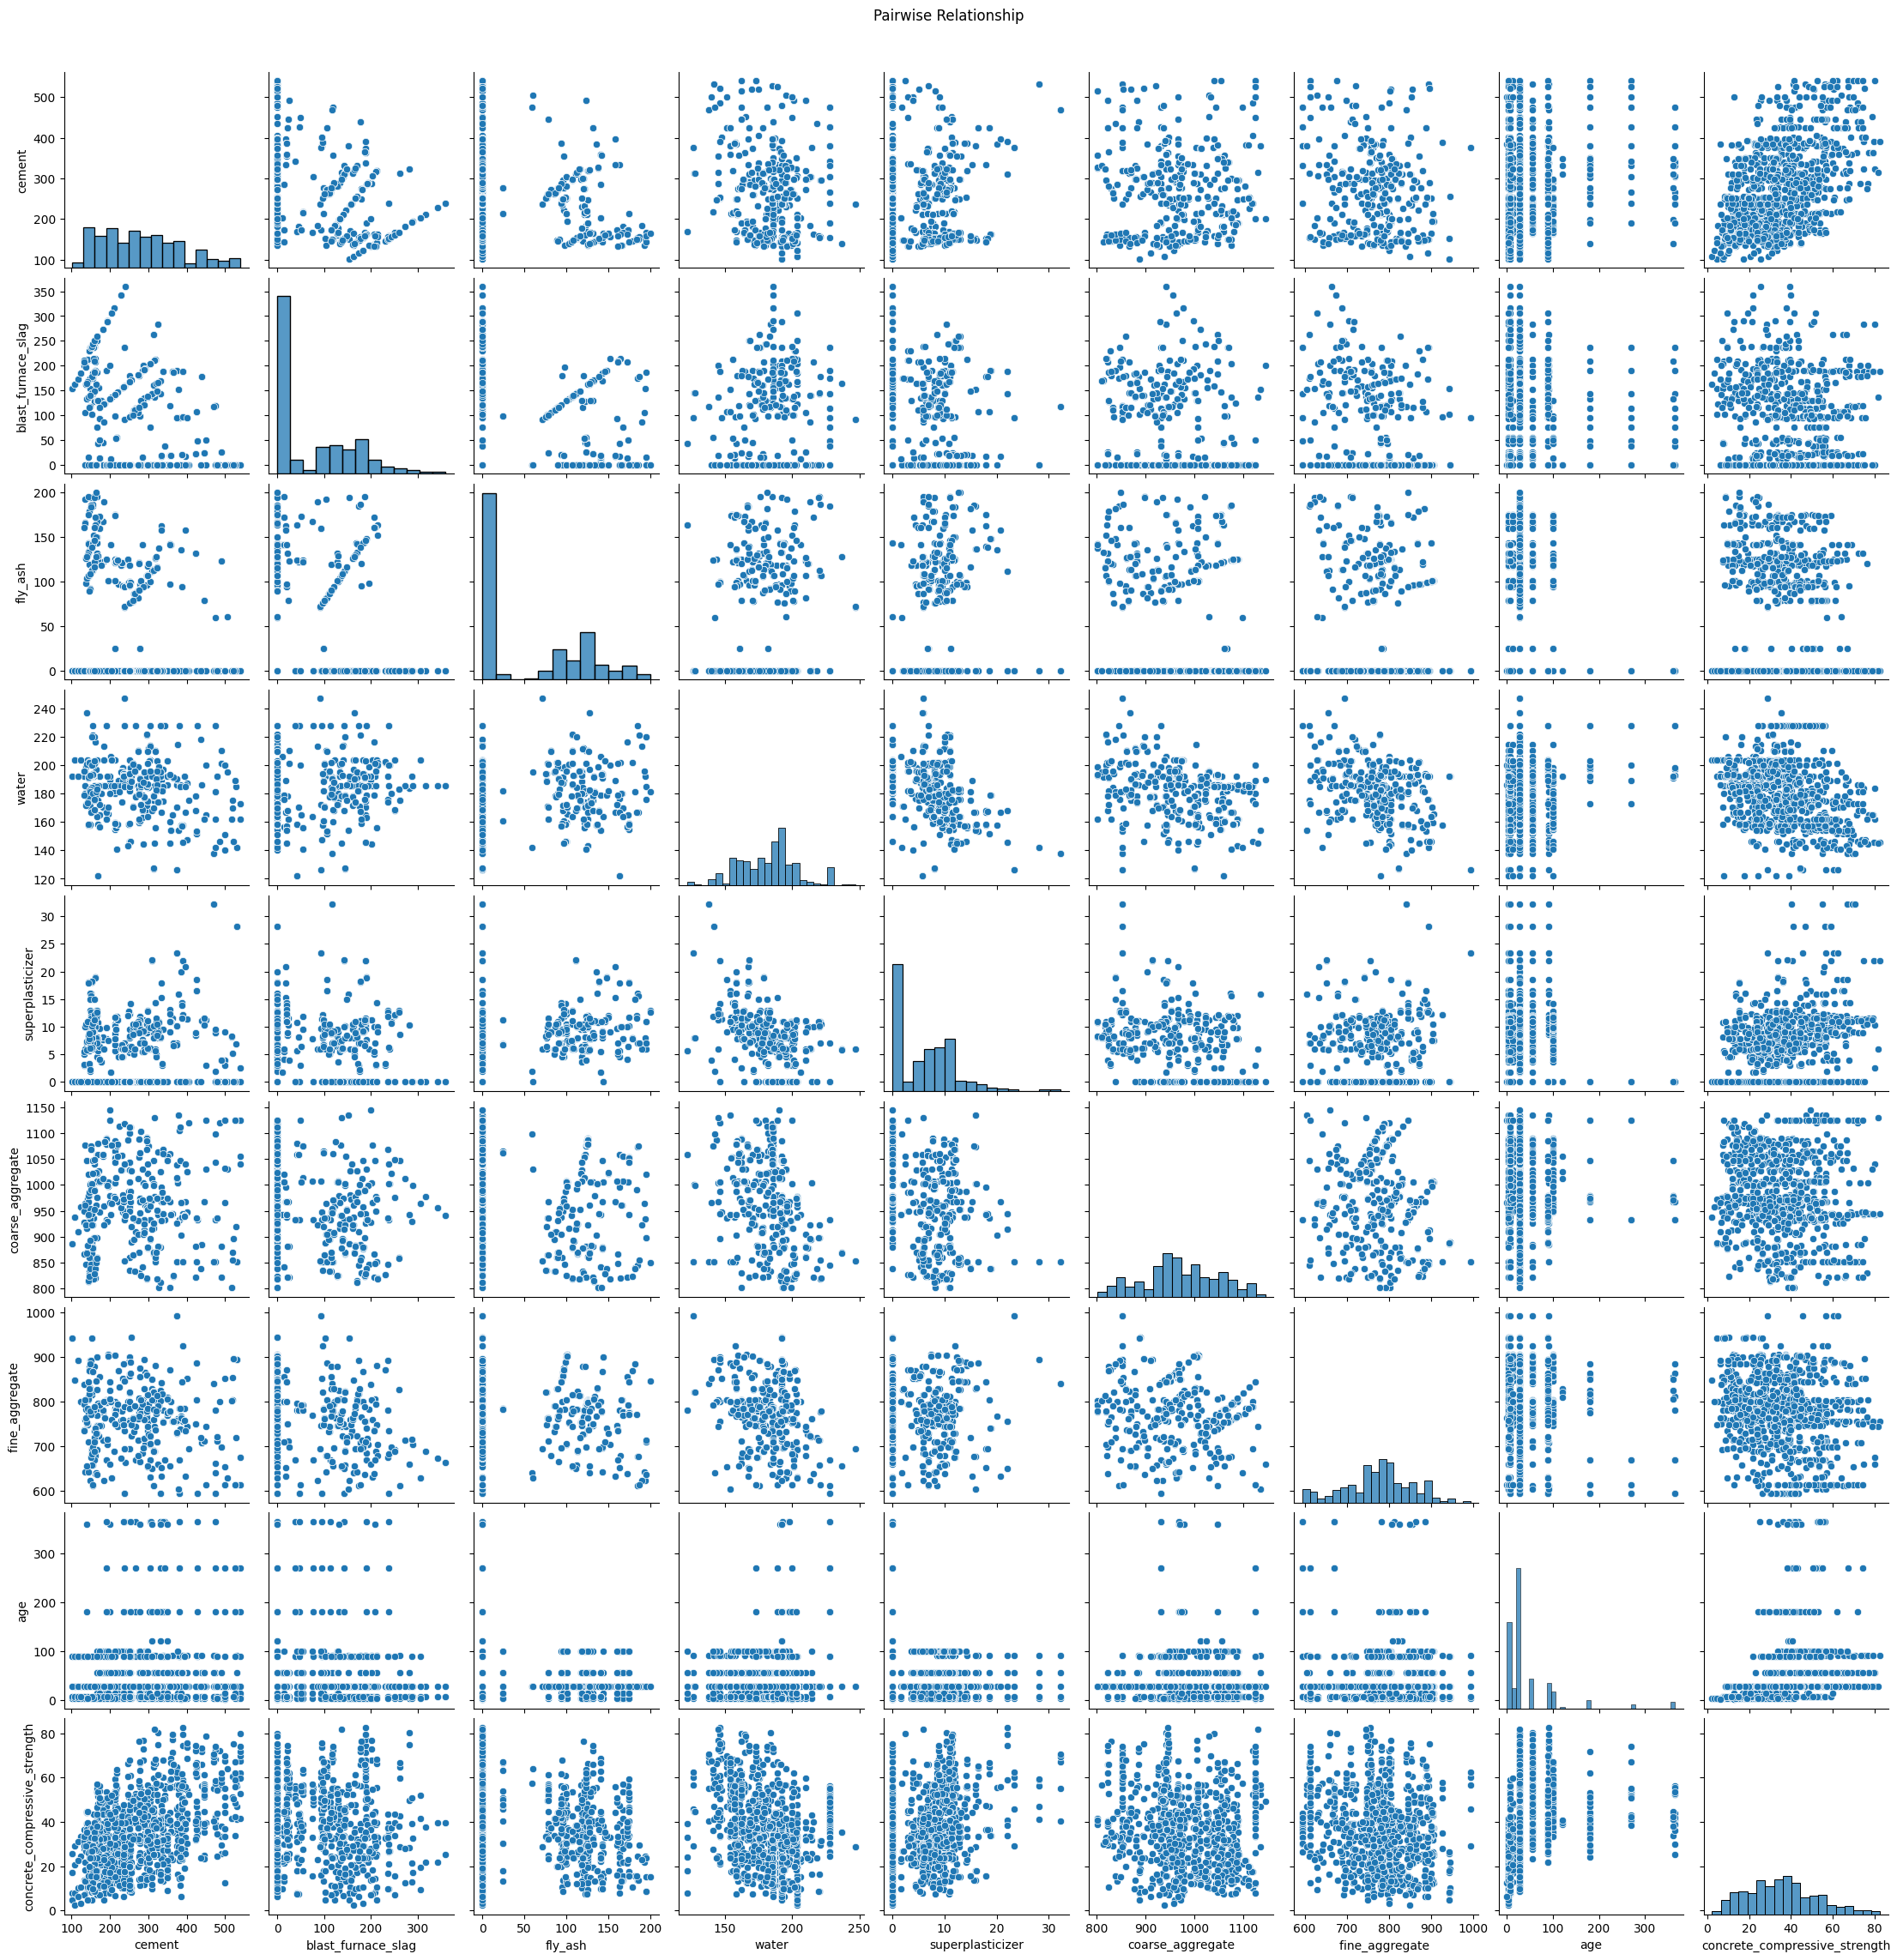

In [31]:
sns.pairplot(df)
plt.suptitle('Pairwise Relationship', y = 1.02)
plt.show()

---

## 🧠 4. Neural Network Model Definition


A simple feedforward neural network (also called a multilayer perceptron) is defined. The architecture includes:


- **Input Layer:** Takes all feature values as input.
- **Hidden Layer:** A fully connected layer followed by a ReLU activation to introduce non-linearity.
- **Output Layer:** A single neuron predicting the concrete strength.

Additionally, methods are defined within the model class to:

- Get different optimizers like Adam, SGD, and RMSProp.
- Use various loss functions: MSE (Mean Squared Error), MAE (Mean Absolute Error), and Huber Loss.


In [ ]:


class Network(nn.Module):

    def __init__(self,
                 input_features,
                 hidden_size1,
                 output_size):

        super(Network, self).__init__()
        self.fc1 = nn.Linear(input_features, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        
        x = self.fc2(x)

        return x

    def get_optimizer_adam(self, lr = 0.001):
         return optim.Adam(self.parameters(), lr=lr)
     
    def get_optimizer_sgd(self, lr = 0.001):
        return optim.SGD(self.parameters(), lr=lr)
    
    def get_optimizer_rmsprop(self, lr = 0.001):
        return optim.RMSprop(self.parameters(), lr=lr)

    def get_loss_function_mse(self):
        return nn.MSELoss() 
    
    def get_loss_function_mae(self):
        return nn.L1Loss() 
    
    def get_loss_function_huber(self, beta_value = 1.0):
        return nn.SmoothL1Loss(beta = beta_value) 
        
    
    




## 🛑 5. Early Stopping

An early stopping mechanism monitors the validation loss during training. If the model fails to improve beyond a threshold for a set number of epochs (`patience`), training is halted early to prevent overfitting.

### 🧾 Parameters:

- **Patience:** Number of epochs to wait before stopping if no improvement.
- **Min Delta:** Minimum change in validation loss to count as an improvement.
- **Verbose:** Whether to print stopping messages or not.


In [55]:

        
class earlystopping:
    def __init__(self, patience=15, min_delta=0.01, verbose=True):
        """
        Args:
            patience (int): Number of epochs to wait before stopping
            min_delta (float): Minimum change in loss to qualify as improvement
            verbose (bool): Whether to print messages
        """
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if (self.best_loss - val_loss) > self.min_delta:
            # Significant improvement
            self.best_loss = val_loss
            self.counter = 0
        else:
            # No significant improvement
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    print(f"Early stopping triggered. No improvement for {self.patience} epochs.")
        return self.early_stop

    def reset(self):
        """Reset the early stopping counter"""
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False

## 📉 6. Loss Visualization

A dynamic interactive plot (using Plotly) is used to compare training and validation loss across epochs. This helps visually assess overfitting or underfitting during training.



In [ ]:

def plot_losses(train_loss, val_loss_):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=list(range(len(train_loss))),
        y=train_loss,
        mode='lines+markers',
        name='Train Loss',
        line=dict(color='royalblue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(len(val_loss_))),
        y=val_loss_,
        mode='lines+markers',
        name='Validation Loss',
        line=dict(color='firebrick')
    ))

    fig.update_layout(
        title='Training vs Validation Loss',
        xaxis_title='Epochs',
        yaxis_title='Loss',
        template='plotly_white',
        hovermode='x unified'
    )
    fig.show()

---

## 🏋️‍♂️ 7. Model Training Function

The training function handles the entire process of:

- Initializing the model on the available device (CPU/GPU).
- Selecting the appropriate loss function (MSE, MAE, or Huber).
- Choosing the optimizer type.
- Training the model across a set number of epochs.
- Evaluating performance on the validation set.
- Triggering early stopping when necessary.

It also logs and stores the loss values during training and validation phases for post-analysis and plotting.


In [ ]:

def train_model(model,
                x_train,
                y_train,
                x_valid,
                y_valid,
                epochs = 50, 
                loss_type = 'mse',
                optimizer_type = 'adam',
                beta_huber = None):
    
    
    model = model.to(device)

    train_loss = []
    val_loss_ = []

    if loss_type == 'mse':
        criterion = model.get_loss_function_mse()
    elif loss_type == 'mae':
        criterion = model.get_loss_function_mae()
    else:
        
        criterion = model.get_loss_function_huber(beta_huber)

    earlystopping_ = earlystopping(patience=5)
    
    if optimizer_type == 'adam':
        optimizer = model.get_optimizer_adam(lr = 0.001)
    elif optimizer_type == 'sgd':
        optimizer = model.get_optimizer_sgd(lr = 0.001)
    else: 
        optimizer = model.get_optimizer_rmsprop(lr = 0.001)

    for epoch in range(epochs):
        model.train()

            
        x_ = x_train.to(device)
        y_= y_train.to(device)

        optimizer.zero_grad()
        out = model(x_)
        loss = criterion(out, y_)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())

        model.eval()

        with torch.no_grad():
            
            x_valid, y_valid = x_valid.to(device), y_valid.to(device)
            validation_out = model(x_valid)
            val_loss = criterion(validation_out, y_valid)

            val_loss_.append(val_loss.item())

            print(f"Epoch {epoch+1}/50 | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

            if earlystopping_(val_loss.item()):
                break


    plot_losses(train_loss, val_loss_)

    return train_loss, val_loss

## 🧪 8. Performance Evaluation

Once training is completed, the model is tested on unseen data to measure its predictive performance. Typical metrics for regression such as **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)** are used to evaluate the model.

These metrics help quantify the average error of predictions and their variance.


In [58]:


def test_model(model, x_test, y_test):


    model.eval()

    with torch.no_grad():
        model = model.to(device)
        x_test_ = x_test.to(device)
        y_test_ = y_test.to(device)
        output = model(x_test_)
        pred = output

    y_true = y_test_.cpu().numpy()
    y_pred = pred.cpu().numpy()
  

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"\nTest MSE: {mse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    


---

## 9. Normalization

Before training the neural network models, feature scaling was applied using **StandardScaler** from `sklearn`. This step ensures that the features have zero mean and unit variance, which helps gradient-based optimizers converge faster and more reliably. Both the input features `x` and the target variable `y` were normalized.


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
x = df.iloc[:,:-1]
x = scaler.fit_transform(x)
y = df.iloc[:,-1]
y = y.values.reshape(-1, 1)
y = scaler.fit_transform(y)
x

array([[ 2.47791487, -0.85688789, -0.84714393, ...,  0.86315424,
        -1.21767004, -0.27973311],
       [ 2.47791487, -0.85688789, -0.84714393, ...,  1.05616419,
        -1.21767004, -0.27973311],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -0.52651741,
        -2.24091709,  3.55306569],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ..., -1.03606368,
         0.0801067 , -0.27973311],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.21464081,
         0.19116644, -0.27973311],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -1.39506219,
        -0.15074782, -0.27973311]])

## 10. Train-Test Split

The dataset was split into training, validation, and test sets using a two-step split strategy:
- 70% of the data was used for training.
- The remaining 30% was split evenly into 15% validation and 15% test sets.
This setup helps monitor the training process and evaluate model generalization effectively.


In [ ]:


x_train, x_tmp, y_train, y_tmp = train_test_split(x,y, test_size=0.3, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_tmp,y_tmp, test_size=0.5, random_state=42)


## 11. Creating Tensors

All datasets (train, validation, test) were converted into PyTorch tensors and transferred to the computing device (CPU or GPU). This step is necessary for compatibility with PyTorch-based neural network training.


In [ ]:

tensor_x_train = torch.Tensor(x_train).float().to(device)
tensor_x_val   = torch.Tensor(x_valid).float().to(device)
tensor_x_test  = torch.Tensor(x_test).float().to(device)

tensor_y_train = torch.Tensor(np.asarray(y_train)).float().to(device)
tensor_y_val   = torch.Tensor(np.asarray(y_valid)).float().to(device)
tensor_y_test  = torch.Tensor(np.asarray(y_test)).float().to(device)

## 💡 12. Model Training and Comparison


### Hidden Layer Size

- **MLP with 32 Hidden Units**  
  - **Test MSE:** 0.5904  
  - **Test MAE:** 0.6249  

In [63]:
model = Network(input_features=tensor_x_train.shape[1], hidden_size1= 32, output_size=1)
train_model(model, tensor_x_train, tensor_y_train, tensor_x_val, tensor_y_val, epochs=50, loss_type='mse',optimizer_type='adam')
test_model(model,tensor_x_test, tensor_y_test )

Epoch 1/50 | Train Loss: 1.1368 | Val Loss: 1.1455
Epoch 2/50 | Train Loss: 1.1236 | Val Loss: 1.1331
Epoch 3/50 | Train Loss: 1.1106 | Val Loss: 1.1209
Epoch 4/50 | Train Loss: 1.0977 | Val Loss: 1.1089
Epoch 5/50 | Train Loss: 1.0850 | Val Loss: 1.0971
Epoch 6/50 | Train Loss: 1.0725 | Val Loss: 1.0855
Epoch 7/50 | Train Loss: 1.0602 | Val Loss: 1.0741
Epoch 8/50 | Train Loss: 1.0480 | Val Loss: 1.0628
Epoch 9/50 | Train Loss: 1.0359 | Val Loss: 1.0518
Epoch 10/50 | Train Loss: 1.0240 | Val Loss: 1.0409
Epoch 11/50 | Train Loss: 1.0123 | Val Loss: 1.0302
Epoch 12/50 | Train Loss: 1.0008 | Val Loss: 1.0197
Epoch 13/50 | Train Loss: 0.9894 | Val Loss: 1.0094
Epoch 14/50 | Train Loss: 0.9781 | Val Loss: 0.9992
Epoch 15/50 | Train Loss: 0.9671 | Val Loss: 0.9893
Epoch 16/50 | Train Loss: 0.9561 | Val Loss: 0.9794
Epoch 17/50 | Train Loss: 0.9454 | Val Loss: 0.9698
Epoch 18/50 | Train Loss: 0.9347 | Val Loss: 0.9602
Epoch 19/50 | Train Loss: 0.9243 | Val Loss: 0.9509
Epoch 20/50 | Train L


Test MSE: 0.5904
Test MAE: 0.6249


- **MLP with 16 Hidden Units**  
  - **Test MSE:** 0.6999  
  - **Test MAE:** 0.6862  

In [64]:
model = Network(input_features=tensor_x_train.shape[1], hidden_size1= 16, output_size=1)
train_model(model, tensor_x_train, tensor_y_train, tensor_x_val, tensor_y_val, epochs=50, loss_type='mse',optimizer_type='adam')
test_model(model,tensor_x_test, tensor_y_test )

Epoch 1/50 | Train Loss: 1.1094 | Val Loss: 1.1716
Epoch 2/50 | Train Loss: 1.1020 | Val Loss: 1.1641
Epoch 3/50 | Train Loss: 1.0947 | Val Loss: 1.1567
Epoch 4/50 | Train Loss: 1.0875 | Val Loss: 1.1493
Epoch 5/50 | Train Loss: 1.0804 | Val Loss: 1.1421
Epoch 6/50 | Train Loss: 1.0734 | Val Loss: 1.1350
Epoch 7/50 | Train Loss: 1.0664 | Val Loss: 1.1280
Epoch 8/50 | Train Loss: 1.0595 | Val Loss: 1.1210
Epoch 9/50 | Train Loss: 1.0527 | Val Loss: 1.1141
Epoch 10/50 | Train Loss: 1.0459 | Val Loss: 1.1073
Epoch 11/50 | Train Loss: 1.0392 | Val Loss: 1.1005
Epoch 12/50 | Train Loss: 1.0326 | Val Loss: 1.0938
Epoch 13/50 | Train Loss: 1.0260 | Val Loss: 1.0871
Epoch 14/50 | Train Loss: 1.0195 | Val Loss: 1.0806
Epoch 15/50 | Train Loss: 1.0131 | Val Loss: 1.0741
Epoch 16/50 | Train Loss: 1.0067 | Val Loss: 1.0676
Epoch 17/50 | Train Loss: 1.0003 | Val Loss: 1.0613
Epoch 18/50 | Train Loss: 0.9940 | Val Loss: 1.0550
Epoch 19/50 | Train Loss: 0.9878 | Val Loss: 1.0487
Epoch 20/50 | Train L


Test MSE: 0.6999
Test MAE: 0.6862


**Conclusion:**  
The MLP model with 32 hidden units outperforms the 16-unit model in both MSE and MAE, indicating that a larger hidden layer captures more complex patterns in the data and improves prediction accuracy.

---

### Epoch Comparison

- **MLP with 32 Hidden Units, 20 Epochs**  
  - **Test MSE:** 0.7590  
  - **Test MAE:** 0.7085  

In [65]:
model = Network(input_features=tensor_x_train.shape[1], hidden_size1= 32, output_size=1)
train_model(model, tensor_x_train, tensor_y_train, tensor_x_val, tensor_y_val, epochs=20, loss_type='mse',optimizer_type='adam')
test_model(model,tensor_x_test, tensor_y_test )

Epoch 1/50 | Train Loss: 1.0444 | Val Loss: 1.0686
Epoch 2/50 | Train Loss: 1.0344 | Val Loss: 1.0597
Epoch 3/50 | Train Loss: 1.0245 | Val Loss: 1.0508
Epoch 4/50 | Train Loss: 1.0148 | Val Loss: 1.0421
Epoch 5/50 | Train Loss: 1.0051 | Val Loss: 1.0335
Epoch 6/50 | Train Loss: 0.9955 | Val Loss: 1.0250
Epoch 7/50 | Train Loss: 0.9860 | Val Loss: 1.0166
Epoch 8/50 | Train Loss: 0.9767 | Val Loss: 1.0083
Epoch 9/50 | Train Loss: 0.9674 | Val Loss: 1.0001
Epoch 10/50 | Train Loss: 0.9583 | Val Loss: 0.9920
Epoch 11/50 | Train Loss: 0.9492 | Val Loss: 0.9839
Epoch 12/50 | Train Loss: 0.9403 | Val Loss: 0.9760
Epoch 13/50 | Train Loss: 0.9314 | Val Loss: 0.9682
Epoch 14/50 | Train Loss: 0.9226 | Val Loss: 0.9604
Epoch 15/50 | Train Loss: 0.9140 | Val Loss: 0.9526
Epoch 16/50 | Train Loss: 0.9054 | Val Loss: 0.9450
Epoch 17/50 | Train Loss: 0.8968 | Val Loss: 0.9374
Epoch 18/50 | Train Loss: 0.8884 | Val Loss: 0.9298
Epoch 19/50 | Train Loss: 0.8800 | Val Loss: 0.9223
Epoch 20/50 | Train L


Test MSE: 0.7590
Test MAE: 0.7085


- **MLP with 32 Hidden Units, 100 Epochs**  
  - **Test MSE:** 0.3762  
  - **Test MAE:** 0.5034  

In [66]:
model = Network(input_features=tensor_x_train.shape[1], hidden_size1= 32, output_size=1)
train_model(model, tensor_x_train, tensor_y_train, tensor_x_val, tensor_y_val, epochs=100, loss_type='mse',optimizer_type='adam')
test_model(model,tensor_x_test, tensor_y_test )

Epoch 1/50 | Train Loss: 1.1004 | Val Loss: 1.1251
Epoch 2/50 | Train Loss: 1.0892 | Val Loss: 1.1141
Epoch 3/50 | Train Loss: 1.0783 | Val Loss: 1.1033
Epoch 4/50 | Train Loss: 1.0675 | Val Loss: 1.0926
Epoch 5/50 | Train Loss: 1.0569 | Val Loss: 1.0822
Epoch 6/50 | Train Loss: 1.0464 | Val Loss: 1.0719
Epoch 7/50 | Train Loss: 1.0362 | Val Loss: 1.0619
Epoch 8/50 | Train Loss: 1.0261 | Val Loss: 1.0520
Epoch 9/50 | Train Loss: 1.0161 | Val Loss: 1.0423
Epoch 10/50 | Train Loss: 1.0063 | Val Loss: 1.0327
Epoch 11/50 | Train Loss: 0.9967 | Val Loss: 1.0234
Epoch 12/50 | Train Loss: 0.9872 | Val Loss: 1.0141
Epoch 13/50 | Train Loss: 0.9777 | Val Loss: 1.0051
Epoch 14/50 | Train Loss: 0.9684 | Val Loss: 0.9961
Epoch 15/50 | Train Loss: 0.9592 | Val Loss: 0.9873
Epoch 16/50 | Train Loss: 0.9500 | Val Loss: 0.9786
Epoch 17/50 | Train Loss: 0.9410 | Val Loss: 0.9701
Epoch 18/50 | Train Loss: 0.9319 | Val Loss: 0.9616
Epoch 19/50 | Train Loss: 0.9230 | Val Loss: 0.9532
Epoch 20/50 | Train L


Test MSE: 0.3762
Test MAE: 0.5034


**Conclusion:**  
Training for more epochs significantly improves model performance. The 100-epoch model has the lowest error metrics, showing that extended training helps the model better learn the data distribution.

---

### Loss Function Comparison (100 Epochs, 32 Hidden Units, Adam Optimizer)


- **MAE Loss**  
  - **Test MSE:** 0.3874  
  - **Test MAE:** 0.4876 

In [67]:
model = Network(input_features=tensor_x_train.shape[1], hidden_size1= 32, output_size=1)
train_model(model, tensor_x_train, tensor_y_train, tensor_x_val, tensor_y_val, epochs=100, loss_type='mae',optimizer_type='adam')
test_model(model,tensor_x_test, tensor_y_test )

Epoch 1/50 | Train Loss: 0.8162 | Val Loss: 0.8157
Epoch 2/50 | Train Loss: 0.8122 | Val Loss: 0.8125
Epoch 3/50 | Train Loss: 0.8082 | Val Loss: 0.8093
Epoch 4/50 | Train Loss: 0.8042 | Val Loss: 0.8061
Epoch 5/50 | Train Loss: 0.8003 | Val Loss: 0.8029
Epoch 6/50 | Train Loss: 0.7963 | Val Loss: 0.7997
Epoch 7/50 | Train Loss: 0.7924 | Val Loss: 0.7966
Epoch 8/50 | Train Loss: 0.7885 | Val Loss: 0.7937
Epoch 9/50 | Train Loss: 0.7846 | Val Loss: 0.7907
Epoch 10/50 | Train Loss: 0.7807 | Val Loss: 0.7878
Epoch 11/50 | Train Loss: 0.7768 | Val Loss: 0.7850
Epoch 12/50 | Train Loss: 0.7729 | Val Loss: 0.7823
Epoch 13/50 | Train Loss: 0.7690 | Val Loss: 0.7796
Epoch 14/50 | Train Loss: 0.7652 | Val Loss: 0.7769
Epoch 15/50 | Train Loss: 0.7613 | Val Loss: 0.7742
Epoch 16/50 | Train Loss: 0.7575 | Val Loss: 0.7715
Epoch 17/50 | Train Loss: 0.7536 | Val Loss: 0.7687
Epoch 18/50 | Train Loss: 0.7498 | Val Loss: 0.7660
Epoch 19/50 | Train Loss: 0.7461 | Val Loss: 0.7632
Epoch 20/50 | Train L


Test MSE: 0.3874
Test MAE: 0.4876


- **Huber Loss (β = 1)**  
  - **Test MSE:** 0.4108  
  - **Test MAE:** 0.5289 

In [82]:
model = Network(input_features=tensor_x_train.shape[1], hidden_size1= 32, output_size=1)
train_model(model, tensor_x_train, tensor_y_train, tensor_x_val, tensor_y_val, epochs=100,loss_type='huber',optimizer_type='adam', beta_huber=1)
test_model(model,tensor_x_test, tensor_y_test )

Epoch 1/50 | Train Loss: 0.4565 | Val Loss: 0.4907
Epoch 2/50 | Train Loss: 0.4527 | Val Loss: 0.4870
Epoch 3/50 | Train Loss: 0.4489 | Val Loss: 0.4833
Epoch 4/50 | Train Loss: 0.4452 | Val Loss: 0.4797
Epoch 5/50 | Train Loss: 0.4415 | Val Loss: 0.4761
Epoch 6/50 | Train Loss: 0.4379 | Val Loss: 0.4725
Epoch 7/50 | Train Loss: 0.4342 | Val Loss: 0.4690
Epoch 8/50 | Train Loss: 0.4306 | Val Loss: 0.4655
Epoch 9/50 | Train Loss: 0.4271 | Val Loss: 0.4620
Epoch 10/50 | Train Loss: 0.4235 | Val Loss: 0.4586
Epoch 11/50 | Train Loss: 0.4200 | Val Loss: 0.4552
Epoch 12/50 | Train Loss: 0.4165 | Val Loss: 0.4518
Epoch 13/50 | Train Loss: 0.4130 | Val Loss: 0.4485
Epoch 14/50 | Train Loss: 0.4096 | Val Loss: 0.4452
Epoch 15/50 | Train Loss: 0.4062 | Val Loss: 0.4419
Epoch 16/50 | Train Loss: 0.4028 | Val Loss: 0.4386
Epoch 17/50 | Train Loss: 0.3994 | Val Loss: 0.4354
Epoch 18/50 | Train Loss: 0.3960 | Val Loss: 0.4322
Epoch 19/50 | Train Loss: 0.3927 | Val Loss: 0.4290
Epoch 20/50 | Train L


Test MSE: 0.4108
Test MAE: 0.5289


**Conclusion:**  
- **MSE Loss** achieves the best performance in terms of Test MSE, which is desirable for penalizing large errors more heavily.
- **MAE Loss** achieves the best performance in terms of Test MAE, which means smaller average errors.
- **Huber Loss** balances MSE and MAE but does not outperform either in this case.
- Overall, **MSE** is preferred for this task due to its better generalization on unseen data.

---


### Optimizer Comparison (100 Epochs, MSE Loss, 32 Hidden Units)


- **SGD Optimizer**  
  - **Test MSE:** 0.8917  
  - **Test MAE:** 0.7702  

In [73]:
model = Network(input_features=tensor_x_train.shape[1], hidden_size1= 32, output_size=1)
train_model(model, tensor_x_train, tensor_y_train, tensor_x_val, tensor_y_val, epochs=100,loss_type='mse',optimizer_type='sgd')
test_model(model,tensor_x_test, tensor_y_test )

Epoch 1/50 | Train Loss: 1.0214 | Val Loss: 1.1510
Epoch 2/50 | Train Loss: 1.0198 | Val Loss: 1.1491
Epoch 3/50 | Train Loss: 1.0182 | Val Loss: 1.1472
Epoch 4/50 | Train Loss: 1.0166 | Val Loss: 1.1453
Epoch 5/50 | Train Loss: 1.0151 | Val Loss: 1.1434
Epoch 6/50 | Train Loss: 1.0135 | Val Loss: 1.1416
Early stopping triggered. No improvement for 5 epochs.



Test MSE: 0.8917
Test MAE: 0.7702



- **RMSProp Optimizer**  
  - **Test MSE:** 0.2893  
  - **Test MAE:** 0.4369  


In [74]:
model = Network(input_features=tensor_x_train.shape[1], hidden_size1= 32, output_size=1)
train_model(model, tensor_x_train, tensor_y_train, tensor_x_val, tensor_y_val, epochs=100,loss_type='mse',optimizer_type='rmsprop')
test_model(model,tensor_x_test, tensor_y_test )

Epoch 1/50 | Train Loss: 1.3288 | Val Loss: 1.1631
Epoch 2/50 | Train Loss: 1.1817 | Val Loss: 1.0959
Epoch 3/50 | Train Loss: 1.0972 | Val Loss: 1.0464
Epoch 4/50 | Train Loss: 1.0351 | Val Loss: 1.0056
Epoch 5/50 | Train Loss: 0.9843 | Val Loss: 0.9699
Epoch 6/50 | Train Loss: 0.9408 | Val Loss: 0.9382
Epoch 7/50 | Train Loss: 0.9027 | Val Loss: 0.9095
Epoch 8/50 | Train Loss: 0.8686 | Val Loss: 0.8831
Epoch 9/50 | Train Loss: 0.8376 | Val Loss: 0.8587
Epoch 10/50 | Train Loss: 0.8093 | Val Loss: 0.8360
Epoch 11/50 | Train Loss: 0.7832 | Val Loss: 0.8149
Epoch 12/50 | Train Loss: 0.7589 | Val Loss: 0.7952
Epoch 13/50 | Train Loss: 0.7364 | Val Loss: 0.7764
Epoch 14/50 | Train Loss: 0.7153 | Val Loss: 0.7587
Epoch 15/50 | Train Loss: 0.6954 | Val Loss: 0.7418
Epoch 16/50 | Train Loss: 0.6766 | Val Loss: 0.7259
Epoch 17/50 | Train Loss: 0.6590 | Val Loss: 0.7108
Epoch 18/50 | Train Loss: 0.6424 | Val Loss: 0.6966
Epoch 19/50 | Train Loss: 0.6268 | Val Loss: 0.6830
Epoch 20/50 | Train L


Test MSE: 0.2893
Test MAE: 0.4369


**Conclusion:**  
- **RMSProp** performs best among all optimizers with the lowest MSE and MAE. This suggests its adaptive learning rate and moving average of squared gradients help optimize the network more effectively.
- **Adam** also performs well and is a reliable choice, especially in deep learning tasks.
- **SGD** performs the worst, indicating slower convergence and possibly getting stuck in local minima.

---

## 📊 13. **Total Model Performance Comparison**

| **Model Configuration**                           | **Epochs** | **Loss Function** | **Optimizer** | **Test MSE** | **Test MAE** |
|---------------------------------------------------|------------|-------------------|---------------|--------------|--------------|
| **MLP with 32 Hidden Units**                      | 50         | MSE               | Adam          | 0.5904       | 0.6249       |
| **MLP with 16 Hidden Units**                      | 50         | MSE               | Adam          | 0.6999       | 0.6862       |
| **MLP with 32 Hidden Units**                      | 20         | MSE               | Adam          | 0.7590       | 0.7085       |
| **MLP with 32 Hidden Units**                      | 100        | MSE               | Adam          | 0.3762       | 0.5034       |
| **MLP with 32 Hidden Units**                      | 100        | MAE               | Adam          | 0.3874       | 0.4876       |
| **MLP with 32 Hidden Units**                      | 100        | Huber Loss        | Adam          | 0.4108       | 0.5289       |
| **MLP with 32 Hidden Units**                      | 100        | MSE               | SGD           | 0.8917       | 0.7702       |
| **MLP with 32 Hidden Units**                      | 100        | MSE               | RMSProp       | 0.2893       | 0.4369       |

---


## Final Conclusion

- **Best Hidden Layer Size:** 32 units  
- **Best Epoch Count:** 100  
- **Best Loss Function:** MSE  
- **Best Optimizer:** RMSProp  

This configuration—**MLP with 32 hidden units, trained for 100 epochs, using MSE loss and RMSProp optimizer**—provides the best generalization performance with the lowest prediction error.